<a href="https://colab.research.google.com/github/sagar9926/Pytorch/blob/master/CNNVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resource :

https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e

## Outline
1. Using torchvision.datasets with a custom folder of images
2. Occlusion analysis with pretrained model
3. Filter visualisation with pretrained model


In [0]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

## Loading Data


In [2]:
!git clone https://github.com/sagar9926/Pytorch.git

Cloning into 'Pytorch'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 59 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [3]:
!ls

Pytorch  sample_data


In [4]:
cd Pytorch

/content/Pytorch


In [5]:
!ls

'Architecture FFN.pdf'	       IntroToPytorch.ipynb   README.md
 data-1557554654170.zip        LargeCNNs.ipynb
 FFNetworksWithPyTorch.ipynb   Pytorch_CNN.ipynb


In [6]:
!unzip data-1557554654170.zip

Archive:  data-1557554654170.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/imagenet/
  inflating: data/imagenet/.DS_Store  
   creating: __MACOSX/data/imagenet/
  inflating: __MACOSX/data/imagenet/._.DS_Store  
   creating: data/imagenet/1/
  inflating: data/imagenet/1/stethoscope823-1.JPEG  
   creating: __MACOSX/data/imagenet/1/
  inflating: __MACOSX/data/imagenet/1/._stethoscope823-1.JPEG  
  inflating: data/imagenet/1/harmonica593-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-1.JPEG  
  inflating: data/imagenet/1/dome538-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._dome538-1.JPEG  
  inflating: data/imagenet/1/harmonica593-3.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-3.JPEG  
  inflating: data/imagenet/1/dome538-2.JPEG  
  inflating: __MACOSX/data/imagenet/1/._dome538-2.JPEG  
  inflating: data/imagenet/1/harmonica593-2.JP

In [7]:
!ls

'Architecture FFN.pdf'	  FFNetworksWithPyTorch.ipynb   __MACOSX
 data			  IntroToPytorch.ipynb	        Pytorch_CNN.ipynb
 data-1557554654170.zip   LargeCNNs.ipynb	        README.md


In [0]:
with open("data/imagenet_labels.txt") as f:
    classes = eval(f.read())

In [9]:
print(classes)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

In [0]:
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

In [0]:
#Create dataset from custom folder

evalset = torchvision.datasets.ImageFolder(root='./data/imagenet', transform=transform)

In [0]:
batch_size=1

evalloader = torch.utils.data.DataLoader(evalset, batch_size=batch_size, shuffle=True)

In [13]:
dataiter = iter(evalloader)
images, labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([1, 3, 224, 224])
torch.Size([3, 224, 224])
0


## Load pretrained model

In [14]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [15]:
model.eval() # setting the model in eval mode
#this mode ensures certain things like dropout , which is used only in training phase not in evaluation

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Visualise image

In [16]:
np.asarray([0.229, 0.224, 0.225]).reshape(3, 1, 1)

array([[[0.229]],

       [[0.224]],

       [[0.225]]])

In [0]:
def imshow(img, title):
    
    std_correction = np.asarray([0.229, 0.224, 0.225]).reshape(3, 1, 1) # this reshaping is very important as the image size is (3,224,224)
    mean_correction = np.asarray([0.485, 0.456, 0.406]).reshape(3, 1, 1)
    npimg = np.multiply(img.numpy(), std_correction) + mean_correction # when we perform this manipulation the std and mean values get broadcasted over numpy img values
    
    plt.figure(figsize=(batch_size * 4, 4)) # creating figure
    plt.axis('off')
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # (224x224x3)
    plt.title(title)
    plt.show()

In [0]:
def show_batch_images(dataloader):
    images, _ = next(iter(dataloader))
    
    outputs = model(images)
    _, pred = torch.max(outputs.data, 1)
        
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[classes[x.item()] for x in pred])
    
    return images, pred

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 224, 224)


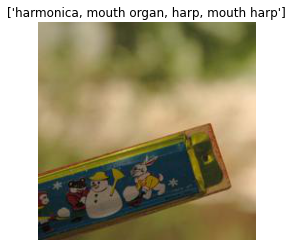

In [30]:
images, pred = show_batch_images(evalloader)

## Occlusion Explaination :

![](https://miro.medium.com/max/1400/1*lkjVOyc3WEEuqdYTTKtkjw.png)

We start frommthe top left corner of the image by occluding (just make the pixel grey) and the calculate the yhat_occluded. The difference of yhat_original and y_hat occluded tells us the value of heatmap in the top left region where the occlusion was performed.

Case 1 : top left occlusion wonn't affect much the output probability of dog thus difference between y_hat and y_hat occluded will be zero thus represented by the red colour.

Case 2 : if we occlude the face of the dog y_hat occluded will become lower drastically thus difference betweenn y_hat_original and y_hat occluded will be high which is clearly visible with blue heatmap at the dogs face

## Occlusion analysis

Deleting a specific part of image, then what is the probability that the prediction would still remain the same.

Here we will delete one part at a time and will perform classifications . i.e 

number of classification output will be equal to the total number od times we deleted a part of the image

For each such deletion we will plot the what is the probability that it's still classified as was in the original image prediction i.e dome

## Get the probability without any occlusion

In [31]:
outputs = model(images) # forward pass
print(outputs.shape)
outputs = nn.functional.softmax(outputs, dim=1) # in our forward pass we were not applying softmax, thus here we are using softmax
prob_no_occ, pred = torch.max(outputs.data, 1) # hat the maximum siftmax value as well as the index of the same
prob_no_occ = prob_no_occ[0].item()
print(prob_no_occ)

torch.Size([1, 1000])
0.7477110624313354


In [32]:
print(images.shape[-2])
print(images.shape[-1])

224
224


In [0]:
def occlusion(model,image,label,occ_size=50, occ_stride=50, occ_pixel=0.5):
  #occ_size : 50x50 default , portion of the original image on which we have to perform occlusion
  #occ_stride : after perfoming occlusion on 50x50 region , shift by 50 such that there is no overlap
  #occ_pixel : what should be the pixel value should i put in the deleted region
  width, height = image.shape[-2], image.shape[-1] # second last and the last indexes
  
  # calculating the size of output heatmap
  output_height = int(np.ceil((height-occ_size)/occ_stride))
  output_width = int(np.ceil((width-occ_size)/occ_stride))
    
  heatmap = torch.zeros((output_height, output_width)) # initializing  heatmap tensor 

  for h in range(0, height):
        for w in range(0, width):
            
            # find the dimension of the occlusion size
            h_start = h*occ_stride 
            w_start = w*occ_stride
            h_end = min(height, h_start + occ_size)
            w_end = min(width, w_start + occ_size)

            # when h = 0,w = 0 :- h_start = 0,w_start = 0,h_end = 50,w_end = 50
            # when h = 0,w = 1 :- h_start = 0,w_start = 50 ,h_end = 50,w_end = 100
            # when h = 0,w = 2 :- h_start = 0,w_start = 100 ,h_end = 50,w_end = 150
            # when h = 0,w = 3 :- h_start = 0,w_start = 150 ,h_end = 50,w_end = 200
            
            if (w_end) >= width or (h_end) >= height:
                continue
            
            input_image = image.clone().detach() # create a copy of input image
            input_image[:, :, w_start:w_end, h_start:h_end] = occ_pixel # perform occlusion of input image 50x50 portion 
            
            output = model(input_image)
            output = nn.functional.softmax(output, dim=1) # calculate the softmax value for the occlusion image
            prob = output.tolist()[0][label]
            
            heatmap[h, w] = prob # initialising the probability to heatmap

  return heatmap


    


Each and every cell represent the probability of classification, if thet particular cell was occluded


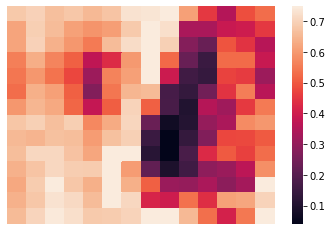

In [34]:
heatmap = occlusion(model, images, pred[0].item(), 32, 14)

imgplot = sns.heatmap(heatmap, xticklabels=False, yticklabels=False, vmax=prob_no_occ)

## Filter visualisation

In [35]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [36]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [0]:
def plot_filters_single_channel_big(t):
    
    nrows = t.shape[0]*t.shape[2]
    ncols = t.shape[1]*t.shape[3]
          
    npimg = np.array(t.numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)
    
    npimg = npimg.T
    
    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200))    
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='Greys', ax=ax, cbar=False)

In [0]:
def plot_filters_single_channel(t):
    
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    nrows = 1 + nplots//ncols
    
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    
    fig = plt.figure(figsize=(ncols, nrows))
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [0]:
def plot_filters_multi_channel(t):
    
    num_kernels = t.shape[0]    # tensor t is input dimension 0 is output channels and 1 is input channels
    
    num_cols = 12 # number of images in single line
    num_rows = num_kernels # total number of images
    
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1) # i + 1 is the index where we are currently plotting
        
        npimg = np.array(t[i].numpy(), np.float32) # tensor to numpy
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)# de normalise
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.tight_layout()
    plt.show()

In [0]:
def plot_weights(model, layer_num, single_channel = True, collated = False):
    
    layer = model.features[layer_num] #access that particular layer
    if isinstance(layer, nn.Conv2d): # checking if this layer is of type nn.Conv2d or not
        weight_tensor = model.features[layer_num].weight.data # access the weights values of this layer
        if single_channel: # if false then plot as RGB combined or if true then plot RGB seperately
            if collated:
                plot_filters_single_channel_big(weight_tensor)
            else:
                plot_filters_single_channel(weight_tensor)
        else:
            if weight_tensor.shape[1] == 3: # single_channel = False will work only with 3 channels layer
                plot_filters_multi_channel(weight_tensor)
            else:
                'Can only plot weights with three channels with single_channel = False'
    else:
        print('Can only visualise layers which are convolutional')

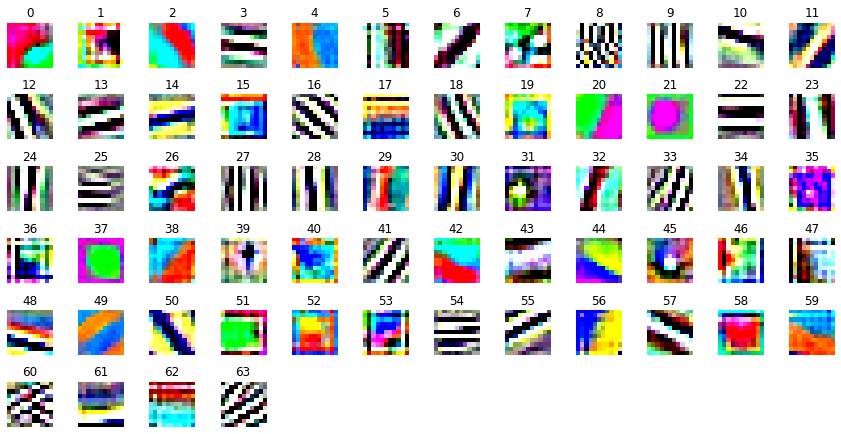

In [41]:
plot_weights(alexnet, 0, single_channel = False)

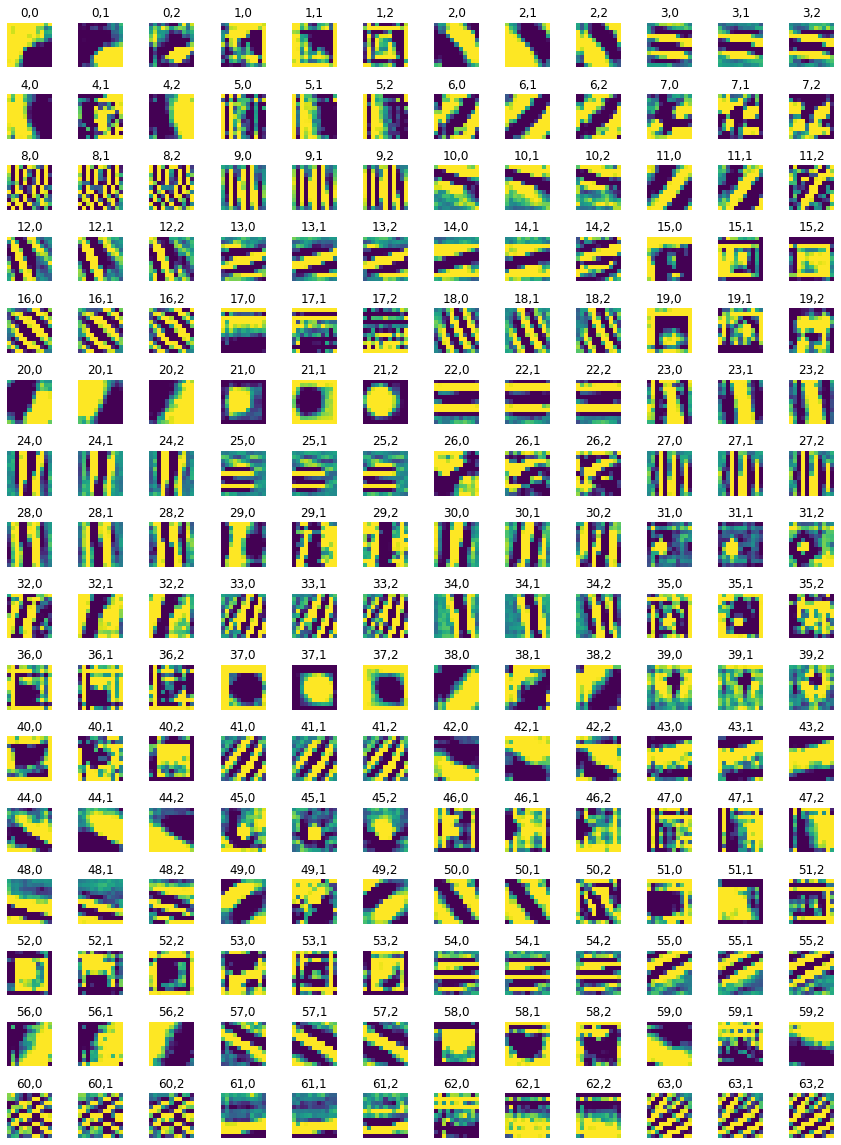

In [42]:
plot_weights(alexnet, 0, single_channel = True)

In [0]:
plot_weights(alexnet, 3, single_channel = True)

In [0]:
 plot_weights(alexnet, 0, single_channel = True, collated = True)

In [0]:
plot_weights(alexnet, 3, single_channel = True, collated = True)

In [0]:
plot_weights(alexnet, 6, single_channel = True, collated = True)

In [0]:
plot_weights(model, 0, single_channel = True, collated = True)

In [0]:
plot_weights(model, 2, single_channel = True, collated = True)

In [0]:
plot_weights(model, 5, single_channel = True, collated = True)